Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Santosh Dhungana"
ID = "st123415"

**Note**: After modify code, you must remove <code>raise NotImplementedError()</code> from your answer cell, unless the cell will have error occurred.

---

# 01-Linear Regression

In this lab, we'll take a look at how to build and evaluate linear regression models. Linear regression works well when there is an (approximately) linear relationship between the features and the variable we're trying to predict.

Before we start, let's import the Python packages we'll need for the tutorial:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Univariate example
Here's an example from <code>[Tim Niven's tutorial at Kaggle](https://www.kaggle.com/timniven/linear-regression-tutorial)</code>.

### Background
We would like to perform *univariate* linear regression using a single feature $x$, "Number of hours studied," to predict a single dependent variable, $y$, "Exam score."

We can say that we want to regress <code>num_hours_studied</code> onto <code>exam_score</code> in order to obtain a model to predict a student's exam score using the number of hours he or she studied.

In the standard setting, we assume that the dependent variable (the exam score) is a random variable that has a Gaussian distribution whose mean is a linear function of the independent variable(s) (the number of hours studied) and whose variance is unknown but constant:

\begin{equation}
y\sim\mathcal{N}(\theta_0+\theta_1x,\sigma^2)
\end{equation}

Our model or hypothesis, then, will be a function predicting $y$ based on $x$:
\begin{equation}
h_\theta(x)=\theta_0+\theta_1x
\end{equation}

Next we'll do something very typical in machine learning experiment: generate some synthetic data for which we know the "correct" model, then use those data to test our algorithm for finding the best model.

So let's generate some example data and examine the relationship between $x$ and $y$:

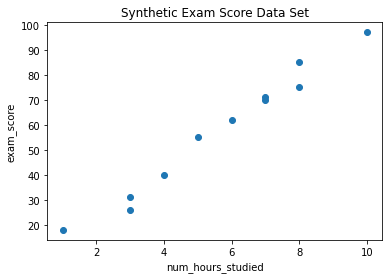

In [3]:
# Independent variable
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

For loading data from file, we can use numpy to load into python.

(97, 2)


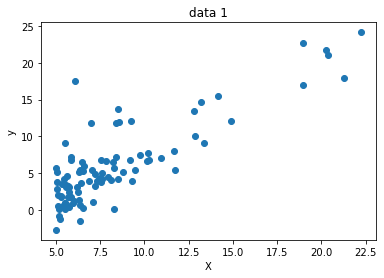

In [4]:
data_txt = np.loadtxt('lab1data1.txt', delimiter=',', usecols=(0, 1))
print(data_txt.shape)

plt.scatter(data_txt[:,0], data_txt[:,1])
plt.xlabel('X')
plt.ylabel('y')
plt.title('data 1')
plt.show()

### Design Matrix
The design matrix, usually written $\mathtt{X}$, contains our independent variables.

In general, with $m$ data points and $n$ features (independent variables), our design matrix will have $m$ rows and $n$ columns.

Note that we have a parameter $\theta_0$, which is the $y$-intercept term in our linear model. There is no independent variable to multiple $\theta_0$, so we will introduced a dummy variable always equal to 1 to represent the independent variable corresponding to $\theta_0$.

Putting the dummy variable and the number of hours studied together, we obtain the design matrix

\begin{equation}
\mathtt{X} = \begin{bmatrix}
    1 & 1\\
    1 & 3\\
    1 & 3\\
    1 & 4\\
    1 & 5\\
    1 & 6\\
    1 & 7\\
    1 & 7\\
    1 & 8\\
    1 & 8\\
    1 & 10\\
\end{bmatrix}
\end{equation} \
Notice that we do **not** include the dependent variable (exam score) in the design matrix.

Add dummy variable for intercept term to design matrix.

To understand the numpy insert function, reading from this [link](https://numpy.org/doc/stable/reference/generated/numpy.insert.html)


In [5]:
# Convert num_hours_studied to be 2D array
X = np.array([num_hours_studied]).T
# Add '1' in front of ordinary data
X = np.insert(X, 0, 1, axis=1)
# set exam_score into y
y = exam_score
# print out the shape of X and y to make sure this is correct dimention
print(X.shape)
print(y.shape)

(11, 2)
(11,)


## Exercise 1.1 (2 point)

Extract <code>data_txt</code> from *lab1data1.txt* file to be X_data, and y_data

In [6]:
X_data = None
y_data = None
# YOUR CODE HERE
X_data = np.array([data_txt[:, 0]]).T
X_data= np.insert(X_data, 0, 1, axis=1)
y_data = data_txt[:, 1]
#raise NotImplementedError()

In [7]:
print(X_data.shape)
print(y_data.shape)

assert X_data.shape == (97,2), "Data size in X1 is incorrect"
assert y_data.shape == (97,), "Data size in y1 is incorrect"

(97, 2)
(97,)


**Expect output**: \
(97, 2) \
(97,)


### Hypothesis

Let's rewrite the hypothesis function now that we have a dummy variable for the intercept term in the model. We can write the independent variables including the dummy variable as a vector

$$\mathbf{x} = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix}, $$

where $x_0 = 1$ is our dummy variable and $x_1$ is the number of hours studied. We also write the parameters as a vector

$$\mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} .$$

Now we can conveniently write the hypothesis as

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

## Exercise 1.2 (2 point)

Write a Python code function to evaluate a hypothesis $\mathbf{\theta}$ for an entire design matrix:

**Hint**: Use numpy function of <code>dot</code>

In [8]:
# Evaluate hypothesis over a design matrix

def h(X,theta):
    #y_predicted = None
    y_predicted= np.dot( X, theta)
    #raise NotImplementedError()
    return y_predicted

In [9]:
theta_test = np.array([0, 10])
res = h(X, theta_test)
res2 = h(X_data, theta_test)

print("result1", res)
print("result2", res2)
assert res.shape[0] == 11 or res.shape == 11, "Data size in result is incorrect"
assert res[4] == 50, "Data result is incorrect"
assert res2.shape[0] == 97 or res2.shape == 97, "Data size in result2 is incorrect"

result1 [ 10  30  30  40  50  60  70  70  80  80 100]
result2 [ 61.101  55.277  85.186  70.032  58.598  83.829  74.764  85.781  64.862
  50.546  57.107 141.64   57.34   84.084  56.407  53.794  63.654  51.301
  64.296  70.708  61.891 202.7    54.901  63.261  55.649 189.45  128.28
 109.57  131.76  222.03   52.524  65.894  92.482  58.918  82.111  79.334
  80.959  56.063 128.36   63.534  54.069  68.825 117.08   57.737  78.247
  70.931  50.702  58.014 117.     55.416  75.402  53.077  74.239  76.031
  63.328  63.589  62.742  56.397  93.102  94.536  88.254  51.793 212.79
 149.08  189.59   72.182  82.951 102.36   54.994 203.41  101.36   73.345
  60.062  72.259  50.269  65.479  75.386  50.365 102.74   51.077  57.292
  51.884  63.557  97.687  65.159  85.172  91.802  60.02   55.204  50.594
  57.077  76.366  58.707  53.054  82.934 133.94   54.369]


**Expect output**: \
result1 [ 10  30  30  40  50  60  70  70  80  80 100] \
result2 [ 61.101  55.277  85.186  70.032  58.598  83.829  74.764  85.781  64.862
  50.546  57.107 141.64   57.34   84.084  56.407  53.794  63.654  51.301
  64.296  70.708  61.891 202.7    54.901  63.261  55.649 189.45  128.28
 109.57  131.76  222.03   52.524  65.894  92.482  58.918  82.111  79.334
  80.959  56.063 128.36   63.534  54.069  68.825 117.08   57.737  78.247
  70.931  50.702  58.014 117.     55.416  75.402  53.077  74.239  76.031
  63.328  63.589  62.742  56.397  93.102  94.536  88.254  51.793 212.79
 149.08  189.59   72.182  82.951 102.36   54.994 203.41  101.36   73.345
  60.062  72.259  50.269  65.479  75.386  50.365 102.74   51.077  57.292
  51.884  63.557  97.687  65.159  85.172  91.802  60.02   55.204  50.594
  57.077  76.366  58.707  53.054  82.934 133.94   54.369]

### Cost function
How can we find the best value of $\mathbf{\theta}$? We need a cost function and an algorithm to minimize that cost function.

In a regression problem, we normally use squared error to measure the goodness of fit:

$$\begin{align}
\ J(\mathbf{\theta}) & = \frac{1}{2} \sum_{i=1}^{m}\left(h_\mathbf{\theta}\left(\mathbf{x}^{(i)}\right) - y^{(i)}\right)^2 \\
\                    & = \frac{1}{2} \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)^\top \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)
\end{align}$$
Here we've used $\mathtt{X}$ to denote the design matrix and $\mathbf{y}$ to denote the vector$$\begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} $$

We'll see in a moment how to minimize this cost function.

## Exercise 1.3 (2 point)

Let's implement **cost function** in Python by these steps:

 1. Calculate $dy = \hat{y} - y = \mathtt{X}\theta - y$
 2. Calcuate $cost = \frac{1}{2}{dy}^T{dy}$

In [10]:
def cost(theta, X, y):
    #J = None
    # YOUR CODE HERE
    dy= np.dot(X, theta) - y
    J= 1/2* (np.dot(dy.T, dy))
    #raise NotImplementedError()
    return J

In [11]:
theta_test = np.array([0, 10])
res = cost(theta_test, X, y)
res2 = cost(theta_test, X_data, y_data)

print(res)
print(res2)

assert cost(theta_test, X, y) == 85.0, "Data result is incorrect"
assert type(cost(theta_test, X_data, y_data)) == np.float64
assert cost(np.array([3, 2]), np.array([[1, 2],[1, 8], [1, 4]]), np.array([10, 3, 8])) == 137.0, "Function cost is incorrect"

85.0
334551.1936199232


**Expect output**: \
85.0 \
334551.1936199232

### Aside: minimizing a convex function using the gradient

To solve our linear regression problem, we want to minimize the cost function $J(\mathbf{\theta})$ above with respect to the parameters $\mathbf{\theta}$.

$J$ is convex (see <code>[Wikipedia](https://en.wikipedia.org/wiki/Convex_function)</code> for an explanation) so it has just one minimum for some specific value of $\mathbf{\theta}$.

To find this minimum, we will find the point at which the gradient is equal to the zero vector.

The gradient of a multivariate function at a particular point is a vector pointing in the direction of maximum slope with a magnitude indicating the slope of the tangent at that point.

To make this clear, let's consider an example in which we consider the function $f(x) = 4x^2 - 6x + 11$ on the interval $[-10, 10]$ and plot its tangent lines at regular intervals.

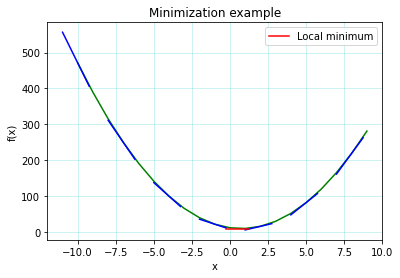

In [12]:
# Define range for plotting x
x = np.arange(-10, 10, 1)

# Example function f(x)
def f(x):
    return 4 * x * x - 6 * x + 11

# Plot f(x)
plt.plot(x, f(x), 'g')

# First derivative of f(x)
def dfx(x):
    return 8 * x - 6

# Plot tangent lines for f(x)
for i in np.arange(-10,10,3):
    x_i = np.arange(i - 1.0, i + 1.0, .25)
    m_i = dfx(i)
    c =  f(i) - m_i*i
    y_i = m_i*(x_i)  +  c
    plt.plot(x_i,y_i,'b')

# Plot tangent line at the minimum of f(x)
minimum = 0.75

for i in [minimum]:
    x_i = np.arange(i - 1, i + 1, .5)
    m_i = dfx(i)
    c = f(i) - m_i * i
    y_i = m_i * (x_i) + c
    plt.plot(x_i, y_i, 'r-', label='Local minimum')

# Decorate the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimization example')
plt.grid(axis='both',color='c', alpha=0.25)
plt.legend();
plt.show()

### Minimizing the cost function

Based on the previous example, we can see that to minimize our cost function, we just need to take the gradient with respect to $\mathbf{\theta}$ and determine where that gradient is equal to $\mathbf{0}$.

We have
$$ J(\mathbf{\theta}) = \frac{1}{2} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 .$$
This is a convex function of two variables ($\theta_0$ and $\theta_1$), so it has a single minimum where the gradient $\nabla_J(\mathbf{\theta})$ is $\mathbf{0}$.

Depending on the specific data, the cost function will look something like the surface plotted by the following code. Regardless of where we begin, the gradient always points "uphill," away from the global minimum.

/tmp/ipykernel_643/3520349788.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


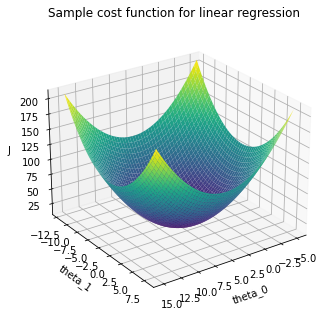

In [13]:
# Plot a sample 2D squared error cost function

from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-5.0, 15.0, 100)
x2 = np.linspace(-12.0, 8.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.square(X1 - np.mean(X1)) + np.square(X2 - np.mean(X2))) + 10

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J')
ax.set_title('Sample cost function for linear regression')
cm = plt.cm.get_cmap('viridis')
ax.plot_surface(X1, X2, Y, cmap=cm)
ax.view_init(elev=25, azim=55)
plt.show()

Take a look at the lecture notes. If you obtain the partial derivatives of the cost function $J$ with respect to $\mathbf{\theta}$, you get

$$ \nabla_J(\mathbf{\theta}) = \mathtt{X}^\top (\mathtt{X}\mathbf{\theta}-\mathbf{y}).$$

## Exercise 1.4 (2 point)

Write **gradient function** in python code from equation above:

In [14]:
# Gradient of cost function
def gradient(X, y, theta):
    #grad = None
    # YOUR CODE HERE
    grad= np.dot(X.T, (np.dot(X, theta)- y))
    #raise NotImplementedError()
    return grad

In [15]:
res = gradient(X, y, theta_test)
res2 = gradient(X_data, y_data, theta_test)

print(res)
print(res2)

assert res.shape == 2 or res.shape[0] == 2, "gradient shape is incorrect"
assert res2.shape == 2 or res2.shape[0] == 2, "gradient shape is incorrect"

[-10 -13]
[ 7348.6099     72624.92611208]


**Expect output**: \
[-10, -13] \
[ 7348.6099     72624.92611208]

This means that if we currently had the parameter vector [0, 10] (where the cost is 85) and wanted to increase the cost, we could move in the direction [-10, -13]. On the other hand, if we wanted to decrease the cost (which of course we do), we should move in the opposite direction, i.e., [10, 13]. 

Recall that the parameters of your model are the $\theta$ values. These are
the values you will adjust to minimize cost $J(\theta)$. To do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$\theta=\theta-\alpha\frac{1}{m} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)x^{(i)}_j$$
$$\theta = \theta - \alpha * \nabla_J(\mathbf{\theta})$$

Simultaneously update $\theta$ for all $j$

## Exercise 1.5 (2 point)

Implement this idea of gradient descent:

1. Calculate gradient from $X$, $y$ and $\theta$ using function <code>gradient</code>
2. Update $\theta_{new} = \theta + {\alpha}*grad$

In [16]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        #grad = None
        grad= gradient(X, y, theta)
        theta= theta - (alpha*grad)
        #raise NotImplementedError()
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [17]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, theta_test, 0.001, 10)
(theta2, J_per_iter2, gradient_per_iter2) = gradient_descent(X_data, y_data, theta_test, 0.001, 10)

print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

print("theta2:", theta2)
print("J_per_iter2:", J_per_iter2)
print("gradient_per_iter2", gradient_per_iter2)

assert (theta.shape[0] == 2 or theta.shape == 2) and (theta2.shape[0] == 2 or theta2.shape == 2), "theta shape is incorrect"
assert len(J_per_iter) == 10 and len(J_per_iter2) == 10, "J history shape is incorrect"
assert gradient_per_iter.shape == (10,2) and gradient_per_iter2.shape == (10,2), "gradient history is incorrect"

theta: [ 0.08327017 10.02116759]
J_per_iter: [84.775269   84.65958757 84.5793525  84.51074587 84.44605981 84.38279953
 84.32015717 84.25787073 84.19585485 84.13408132]
gradient_per_iter [[-10.         -13.        ]
 [ -9.084       -6.894     ]
 [ -8.556648    -3.421524  ]
 [ -8.25039038  -1.4471287 ]
 [ -8.06991411  -0.32491618]
 [ -7.96100025   0.31253312]
 [ -7.8928063    0.67422616]
 [ -7.84778746   0.87905671]
 [ -7.81596331   0.9946576 ]
 [ -7.79165648   1.05950182]]
theta2: [2.49586699e+08 2.48441765e+09]
J_per_iter2: [1.62549391e+07 7.90946753e+08 3.84877236e+10 1.87282617e+12
 9.11323816e+13 4.43453381e+15 2.15785978e+17 1.05002218e+19
 5.10944492e+20 2.48627391e+22]
gradient_per_iter2 [[ 7.34860990e+03  7.26249261e+04]
 [-5.08468779e+04 -5.06651170e+05]
 [ 3.55099975e+05  3.53420425e+06]
 [-2.47666950e+06 -2.46535791e+07]
 [ 1.72768901e+07  1.71975865e+08]
 [-1.20517969e+08 -1.19965161e+09]
 [ 8.40697246e+08  8.36840645e+09]
 [-5.86444912e+09 -5.83754701e+10]
 [ 4.09086221e+10

**Expect output**: \
theta: [ 0.08327017 10.02116759]\
J_per_iter: [84.775269   84.65958757 84.5793525  84.51074587 84.44605981 84.38279953\
 84.32015717 84.25787073 84.19585485 84.13408132]\
gradient_per_iter [[-10.         -13.        ]\
 [ -9.084       -6.894     ]\
 [ -8.556648    -3.421524  ]\
 [ -8.25039038  -1.4471287 ]\
 [ -8.06991411  -0.32491618]\
 [ -7.96100025   0.31253312]\
 [ -7.8928063    0.67422616]\
 [ -7.84778746   0.87905671]\
 [ -7.81596331   0.9946576 ]\
 [ -7.79165648   1.05950182]]\
 theta2: [2.49586699e+08 2.48441765e+09]\
J_per_iter2: [1.62549391e+07 7.90946753e+08 3.84877236e+10 1.87282617e+12\
 9.11323816e+13 4.43453381e+15 2.15785978e+17 1.05002218e+19\
 5.10944492e+20 2.48627391e+22]\
gradient_per_iter2 [[ 7.34860990e+03  7.26249261e+04]\
 [-5.08468779e+04 -5.06651170e+05]\
 [ 3.55099975e+05  3.53420425e+06]\
 [-2.47666950e+06 -2.46535791e+07]\
 [ 1.72768901e+07  1.71975865e+08]\
 [-1.20517969e+08 -1.19965161e+09]\
 [ 8.40697246e+08  8.36840645e+09]\
 [-5.86444912e+09 -5.83754701e+10]\
 [ 4.09086221e+10  4.07209608e+11]\
 [-2.85366163e+11 -2.84057095e+12]]

Optimize for parameters in X and y

In [18]:
theta_initial = np.array([0, 0])
alpha = 0.0001
iterations = 3000
theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)
print('Optimal parameters: theta_0 %f theta_1 %f' % (theta[0], theta[1]))

Optimal parameters: theta_0 2.654577 theta_1 9.641848


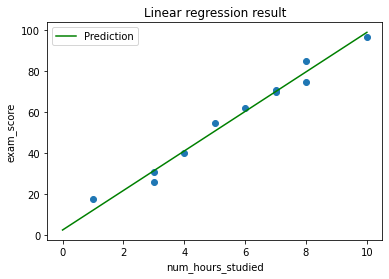

In [19]:
# Visualize the results
plt.scatter(num_hours_studied, exam_score)

x = np.linspace(0,10,20)
y_predicted = theta[0] + theta[1] * x
plt.plot(x, y_predicted, 'g', label='Prediction')

plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.legend();
plt.title('Linear regression result')
plt.show()

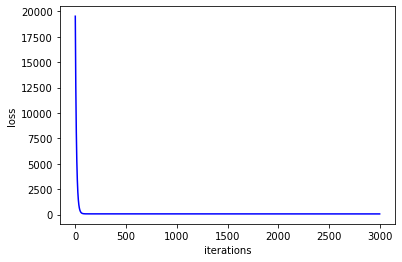

In [20]:
# Visualize the loss
x_loss = np.arange(0, iterations, 1)

plt.plot(x_loss, costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

## Exercise 1.6 (5 point)

Optimize theta2 parameters in X_data and y_data using above functions.

1. Define your own initial_theta, alpha, and iterations.
2. The final cost2 must less than 435.

In [21]:

theta_inital = np.array([X_data.shape[1], 0])
alpha= 0.00001
iterations2=500000
theta2, costs2, grad2 = gradient_descent(X_data, y_data, theta_initial, alpha, iterations2)

# YOUR CODE HERE
#raise NotImplementedError()

In [22]:
print('Optimal parameters: theta_0 %f theta_1 %f' % (theta2[0], theta2[1]))
print(cost(theta2, X_data, y_data))

assert theta_initial.shape == theta2.shape, "Theta initial shape must equal to theta"
assert theta2.shape == 2 or theta2.shape[0] == 2, "theta shape is incorrect"
assert cost(theta2, X_data, y_data) < 435, "Your cost function does not be optimized"

Optimal parameters: theta_0 -3.895781 theta_1 1.193034
434.26622346959226


**Expect result**:\
Optimal parameters: theta_0 -3.895781 theta_1 1.193034\
434.26622346959226

## Exercise 1.7 (5 point)

Plot regression graph of X_data, and y_data with your own theta2

**hint**: to find the reasonable x value, use <code>np.min</code> and <code>np.max</code>

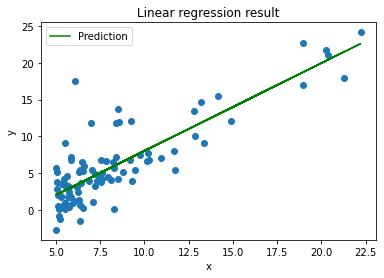

In [23]:
# YOUR CODE HERE


x =X_data[:, 1] #np.linspace(0,10,20)

y_predicted = theta2[0] + theta2[1] * x
plt.scatter(x, y_data)
plt.plot(x, y_predicted, 'g', label='Prediction')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();
plt.title('Linear regression result')
plt.show()
#raise NotImplementedError()

**Expect result**:
<img src="img/ex7expect.png" title="Exersire Expect result" style="width: 400px;" />

## Excercise 1.8 (2 point)

From cost plotting graph at above, please create it as function:

In [24]:
def cost_plot(iterations, costs):
    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    #raise NotImplementedError()

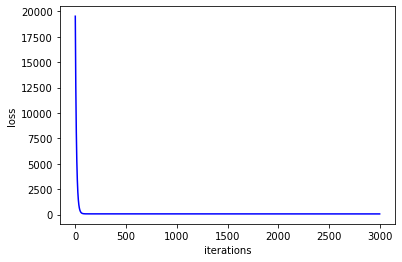

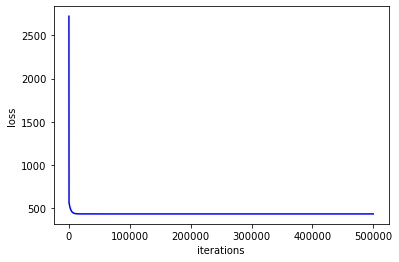

In [25]:
cost_plot(iterations, costs)
cost_plot(iterations2, costs2)


**Expect result**:

<img src="img/ex8expect1.png" title="Exersire Expect result" style="width: 400px;" />
<img src="img/ex8expect2.png" title="Exersire Expect result" style="width: 400px;" />

We can conclude from the loss curve that we have achieved convergence (the loss has stopped improving), and we can conclude that 3000 iterations is overkill! The loss is stable after 100 iterations or so.

### Goodness of fit
$R^2$ is a statistic that will give some information about the goodness of fit of a regression model.
The sum squared regression is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared. As it is a percentage it will take values between 0 and 1.

The $R^2$ coefficient of determination is 1 when the regression predictions perfectly fit the data. When $R^2$ is less than 1, it indicates the percentage of the variance in the target that is accounted for by the prediction.

if output of $R^2$ less than 0, it means that $R^2$ is 0. None of the variation in the prediction is accounted for by the input values

$$\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}$$

## Exercise 1.9 (3 point)

Create **goodnees of fit** function by using the equation at above

In [26]:
def goodness_of_fit(y, y_predicted):
    r_square = None
    # YOUR CODE HERE
    r_square= 1-(np.sum((y -y_predicted)**2) /np.sum((y-np.mean(y))**2))
    if r_square<0:
        r_square=0
    else:
        r_square= r_square
    #raise NotImplementedError()
    return r_square

In [27]:
y_predicted = h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

y_predicted2 = h(X_data, theta)
r_square2 = goodness_of_fit(y_data, y_predicted2)
print(r_square2)

yhat =  h(X, np.array([0, 10]))
yhat2 =  h(X, np.array([10, 0]))
r2 = goodness_of_fit(y, yhat)
r3 = goodness_of_fit(y, yhat2)
assert np.round(r2, 5) == np.round(0.9740385950298487, 5), "Function goodness_of_fit is incorrect"
assert r3 <= 0, "Function goodness_of_fit is incorrect"

0.9786239731773175
0


**Expect output**: \
0.9786239731773175 \
0

An $R^2$ of 0.98 indicates an extremely good (outrageously good, in fact) fit to the data.

## Multivariate linear regression

Next, we extend to multiple variables. We'll use a data set from Andrew Ng's class. The data include two independent variables, "Square Feet" and "Number of Bedrooms," and the dependent variable is "Price."

Let's load the data:

In [28]:
# We use numpy's genfromtxt function to load the data from the text file.

raw_data = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);

raw_data[0:5, :]

array([['Square Feet', ' Number of bedrooms', 'Price'],
       ['2104', '3', '399900'],
       ['1600', '3', '329900'],
       ['2400', '3', '369000'],
       ['1416', '2', '232000']], dtype='<U19')

Next, we split the raw data (currently strings) into headers and the data themselves:

In [29]:
# Extract headers and data
headers = raw_data[0,:];
print(headers)
data = np.array(raw_data[1:,:], dtype=float);
print(data[0:5, :])

['Square Feet' ' Number of bedrooms' 'Price']
[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


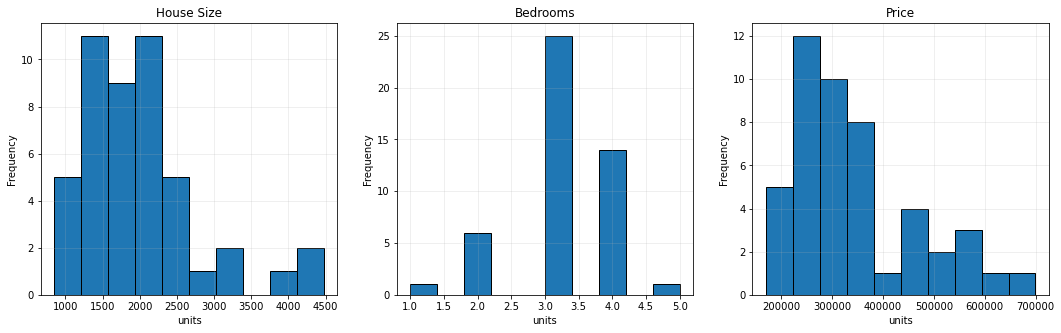

In [30]:
# Visualise the distribution of independent and dependent variables

# Make three subplots, in one row and three columns
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

# Variable 1: square footage
plt1.hist(data[:,0], label='Sq. feet', edgecolor='black')
plt1.set_title('House Size')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

# Variable 2: number of bedrooms
plt2.hist(data[:,1], label='Bedroom', edgecolor='black')
plt2.set_title('Bedrooms')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

# Variable 3: home price
plt3.hist(data[:,2], label='Price', edgecolor='black')
plt3.set_title('Price')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

### Standardization
We can see from the charts above that the independent variables and the dependent variables have very large differences in their ranges. If you try to use the gradient descent method on these data directly, you will have great difficulty in finding a learning rate that is small enough that the costs will not grow out of control but is large enough that the number of iterations is not excessive.

Standardization can help with this. For each variable, we subtract that variable's mean from every instance then divide the result by the variable's standard deviation. The result will be a set of "standardized" variables with mean 0 and variance 1.

In [31]:
# Standardize the data
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_norm = (data - means) / stds

In [32]:
# Extract y from normalized data
y_label = 'Price'
y_index = np.where(headers == y_label)[0][0]
print(y_index)
y = np.array([data_norm[:,y_index]]).T

# Extract X from normalized data
X = data_norm[:,0:y_index]

# Insert column of 1's for intercept term
X = np.insert(X, 0, 1, axis=1)

2


In [33]:
# Get number of examples (m) and number of parameters (n)
m = X.shape[0]
n = X.shape[1]
print(m, n)

47 3


## Excercise 1.10 (5 point)

Optimize the parameters using gradient descent:

In [34]:
theta_initial = np.zeros((X.shape[1],1))
alpha = 0.0001
iterations = 10000

theta, costs, grad = None, None, None
# YOUR CODE HERE
theta, costs, grad= gradient_descent(X, y, theta_initial, alpha, iterations)
#raise NotImplementedError()

In [35]:
print('Theta values ', theta)

Theta values  [[-9.08384479e-17]
 [ 8.84765987e-01]
 [-5.31788192e-02]]


**Expect output**:\
Theta values  [[-9.15933995e-17]\
 [ 8.84765988e-01]\
 [-5.31788197e-02]]

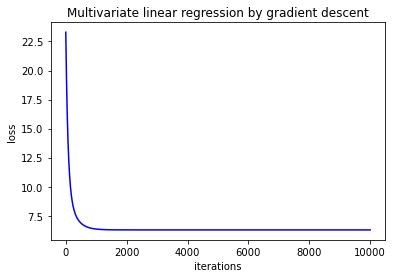

In [36]:
# Visualize the loss over the optimization
plt.title('Multivariate linear regression by gradient descent')
cost_plot(iterations, costs)

Transforming parameters back to the original scale
Now that we've got optimal parameters for our original data, we need to undo the normalization.

We have

$$\hat{y}^{\text{norm}} = \theta^\text{norm} \textbf{x}^\text{norm}$$

## Excercise 1.11 (2 point)

Compute goodness of fit

In [37]:
# Goodness of fit
y_predicted =  h(X,theta)
r_square = None
# YOUR CODE HERE
r_square = goodness_of_fit(y, y_predicted)
#raise NotImplementedError()

In [38]:
print(r_square)

0.7329450180289143


### Transform standardized data back to original scale
We can transform standardized predicted values, y_predicted into the orginal data scale using$$y_{\text{norm}} = \sigma_y y + \mu_y$$

In [39]:
# Compute mean and standard deviation of data

sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))

# De-normalize y

y_predicted =  np.round(h(X, theta) * sigma[2] + mu[2])

# Print first five values of y_predicted

print(y_predicted[0:5,:])

[[356283.]
 [286121.]
 [397489.]
 [269244.]
 [472278.]]


/tmp/ipykernel_643/3345295611.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


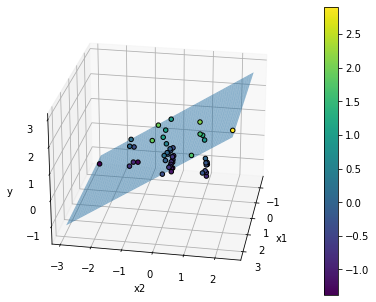

In [40]:
# 3D plot of standardized data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,1],X[:,2],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)

yy = (theta[0] + theta[1]*xx1.T + theta[2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()

### In-class exercise
Now that you're familiar with minimizing a cost function using its gradient and gradient descent, refer to the lecture notes to find the analytical solution (the normal equations) to the linear regression problem.

Implement the normal equation approach for the synthetic univariate data set and the housing price data set. Demonstrate your solution in the lab.

In [41]:
# just remove all parameters
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [42]:
import matplotlib.pyplot as plt
import numpy as np

## Exercise 2.1 (3 point)
Download raw_data and setup data

In [43]:
# Download raw_data and setup data
raw_data = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);
headers = raw_data[0,:];
print(headers)
data = np.array(raw_data[1:,:], dtype=float);
# YOUR CODE HERE
#raise NotImplementedError()

['Square Feet' ' Number of bedrooms' 'Price']


In [44]:
print(data[:5])

assert np.array_equal(np.round(data[7], 5), np.round([1.42700e+03, 3.00000e+00, 1.98999e+05], 5)), "data is incorrect"

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


**Expect result**:\
[[2.104e+03 3.000e+00 3.999e+05]\
 [1.600e+03 3.000e+00 3.299e+05]\
 [2.400e+03 3.000e+00 3.690e+05]\
 [1.416e+03 2.000e+00 2.320e+05]\
 [3.000e+03 4.000e+00 5.399e+05]]

## Exercise 2.2 (5 point)
Normalized data

In [45]:
# Normalized data
def normalized_data(data):
    # YOUR CODE HERE
    mean = np.mean(data, axis=0)
    std= np.std(data, axis=0)
    normalized = (data- mean)/std
    #raise NotImplementedError()
    return normalized

In [46]:
data_norm = normalized_data(data)
print(data_norm[:5])

assert np.array_equal(np.round(data_norm[7], 5), np.round([-0.72968575, -0.22609337, -1.1431751 ], 5)), "data is incorrect"

[[ 0.13141542 -0.22609337  0.48089023]
 [-0.5096407  -0.22609337 -0.08498338]
 [ 0.5079087  -0.22609337  0.23109745]
 [-0.74367706 -1.5543919  -0.87639804]
 [ 1.27107075  1.10220517  1.61263744]]


**Expect result**:\
[[ 0.13141542 -0.22609337  0.48089023]\
 [-0.5096407  -0.22609337 -0.08498338]\
 [ 0.5079087  -0.22609337  0.23109745]\
 [-0.74367706 -1.5543919  -0.87639804]\
 [ 1.27107075  1.10220517  1.61263744]]

## Exercise 2.3 (5 point)
Extract X and y from data

In [47]:
# Extract y from data
y = None
# YOUR CODE HERE
y_lab= "Price"
y_index= np.where(headers==y_lab)[0][0]
#raise NotImplementedError()
y= data_norm[:, y_index]

In [48]:
print(y[:5])

assert np.array_equal(np.round(y[10:14], 5), np.round([-0.81173485,  0.05325146, -0.08418307,  2.90606282], 5)), "data is incorrect"

[ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744]


**Expect result**: [ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744]

In [49]:
# Extract X from data
X = None
# YOUR CODE HERE
x_index= np.where(headers!=y_lab)[0]
X= data_norm[:, x_index]
#raise NotImplementedError()
X = np.insert(X, 0, 1, axis=1)

In [50]:
print(X[:5,:])

assert np.array_equal(np.round(X[10,:], 5), np.round([ 1., -0.0771822, 1.10220517], 5)), "data is incorrect"

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


**Expect result**:\
[[ 1.          0.13141542 -0.22609337]\
 [ 1.         -0.5096407  -0.22609337]\
 [ 1.          0.5079087  -0.22609337]\
 [ 1.         -0.74367706 -1.5543919 ]\
 [ 1.          1.27107075  1.10220517]]

## Exercise 2.4 (8 point)
Create h, cost, gradient, and gradient_descent

In [51]:
np.array([1,2,4]).shape
X.shape

(47, 3)

In [52]:
# create h function
def h(X,theta):
    #y_predicted = None
    # YOUR CODE HERE
    y_predicted= X @ theta #or  #np.dot(X,theta) 
    #raise NotImplementedError()
    return y_predicted
res= h(X, np.array([1, 2, 4]))

In [53]:
print(h(X, np.array([1, 2, 4]))[:5])

assert res.shape == (X.shape[0],), "Data size in result is incorrect"
assert np.array_equal(np.round(h(X, np.array([1, 3, 10]))[:5], 5), np.round([-0.86668741,-2.78985577,0.26279242,-16.7749502,15.83526391],5)), "Function h is incorrect"

[ 0.35845737 -0.92365487  1.11144393 -6.70492173  7.95096216]


**Expect result**: [ 0.35845737 -0.92365487  1.11144393 -6.70492173  7.95096216]

In [54]:
def cost(theta, X, y):
    #J = None
    # YOUR CODE HERE
    dy = h(X, theta)- y
    J= (1/2) * np.dot(dy.T, dy)
    #raise NotImplementedError()
    return J

In [55]:
print(cost(np.array([1, 8, 10]), X, y))

assert np.round(cost(np.array([1, 8, 10]), X, y), 5) == np.round(5477.13863, 5), "Data result is incorrect"
assert np.round(cost(np.array([2, 1, 2]), X, y), 5) == np.round(205.8799553398718, 5), "Function cost is incorrect"

5477.13862837469


**Expect result**: 5477.138628374691

In [56]:
# Gradient of cost function
def gradient(X, y, theta):
    #grad = None
    # YOUR CODE HERE
    grad = np.dot(X.T, (np.dot(X, theta) -y))
    #raise NotImplementedError()
    return grad

In [57]:
print(gradient(X, y, np.array([1, 8, 10])))

assert np.array_equal(np.round(gradient(X, y, np.array([3.1, -2.1, 4.8])), 5), np.round([145.7,-12.55581557,149.54496443],5)), "Function gradient is incorrect"
assert np.round(gradient(X, y, np.array([3.2, 1.0, 2.5]))[0] - gradient(X, y, np.array([3.2, 1.0, 2.5]))[1], 5) == np.round(77.78827035558807, 5), "Data result is incorrect"

[ 47.         599.00016917 659.76139633]


**Expect result**: [ 47.         599.00016917 659.76139633]

In [58]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
 
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
       
        #grad=None
        grad =  gradient(X, y, theta)
        # update theta
        # theta = None
        # YOUR CODE HERE
        
       
        # calc new theta
        theta= theta - (alpha*grad)
        J= cost(theta, X, y)
        
        #raise NotImplementedError()
        
        
        J_per_iter[iter] = J
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [59]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, np.array([0, 1, 10]), 0.001, 10)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

assert np.array_equal(np.round(theta, 2), np.round([-8.20787882e-16,-7.72838948e-01,6.35294636e+00], 2)), "the data result in theta is incorrect"
assert np.round(gradient_per_iter[5, 0], 5) == np.round(1.11022302e-13, 5), "the data result in gradient_per_iter is incorrect"

theta: [-8.40327807e-16 -7.72838948e-01  6.35294636e+00]
J_per_iter: [2123.51284628 1873.56259758 1656.90935568 1468.93187452 1305.65834104
 1163.67477334 1040.04635308  932.24986509  838.11567544  755.77790087]
gradient_per_iter [[1.45661261e-13 2.70000169e+02 4.75532186e+02]
 [1.12798659e-13 2.44794887e+02 4.46076185e+02]
 [1.01252340e-13 2.21549490e+02 4.18667980e+02]
 [8.70414851e-14 2.00117968e+02 3.93159744e+02]
 [1.04805054e-13 1.80365065e+02 3.69414440e+02]
 [6.88338275e-14 1.62165488e+02 3.47305031e+02]
 [5.72875081e-14 1.45403177e+02 3.26713748e+02]
 [5.37347944e-14 1.29970626e+02 3.07531415e+02]
 [6.07291994e-14 1.15768253e+02 2.89656812e+02]
 [4.81836793e-14 1.02703825e+02 2.72996100e+02]]


**Expect result**:
theta: [-8.20787882e-16 -7.72838948e-01  6.35294636e+00]\
J_per_iter: [2123.51284628 1873.56259758 1656.90935568 1468.93187452 1305.65834104\
 1163.67477334 1040.04635308  932.24986509  838.11567544  755.77790087]\
gradient_per_iter [[1.31450406e-13 2.70000169e+02 4.75532186e+02]\
 [9.68114477e-14 2.44794887e+02 4.46076185e+02]\
 [9.63673585e-14 2.21549490e+02 4.18667980e+02]\
 [8.92619312e-14 2.00117968e+02 3.93159744e+02]\
 [1.11022302e-13 1.80365065e+02 3.69414440e+02]\
 [7.40518757e-14 1.62165488e+02 3.47305031e+02]\
 [5.05151476e-14 1.45403177e+02 3.26713748e+02]\
 [6.09512441e-14 1.29970626e+02 3.07531415e+02]\
 [6.29496455e-14 1.15768253e+02 2.89656812e+02]\
 [4.74065232e-14 1.02703825e+02 2.72996100e+02]]\

## Exercise 2.5 (5 point)

Do optimization using gradient descent with $\alpha = 0.003$ and 30,000 iterations. The theta_initial is zero-values.

In [60]:
theta_initial = np.array([0.,0., 0.])
#print(theta_initial)
alpha = 0.003
iterations =30000

theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)
# YOUR CODE HERE
#raise NotImplementedError()

In [61]:
print("theta:", theta)
print("cost_per_iter:", costs[-5:])
print("gradient_per_iter", grad[-5:])

assert alpha == 0.003, "initial alpha is incorrect"
assert iterations == 30000, "initial iteration is incorrect"
assert np.array_equal(np.round(theta, 5), np.round([-1.05832010e-16,8.84765988e-01,-5.31788197e-02], 5)), "the data result in theta is incorrect"
assert np.round(grad[2, 1], 5) == np.round(-2.70822645e+01, 5), "the data result in gradient_per_iter is incorrect"

theta: [-8.27671265e-17  8.84765988e-01 -5.31788197e-02]
cost_per_iter: [6.27579208 6.27579208 6.27579208 6.27579208 6.27579208]
gradient_per_iter [[-2.49800181e-16 -1.62370117e-14 -4.87457297e-16]
 [ 1.94289029e-16 -1.66811009e-14 -4.87457297e-16]
 [-2.49800181e-16 -1.62370117e-14 -4.87457297e-16]
 [ 1.94289029e-16 -1.66811009e-14 -4.87457297e-16]
 [-2.49800181e-16 -1.62370117e-14 -4.87457297e-16]]


**Expect result**:\
theta: [-1.05832010e-16  8.84765988e-01 -5.31788197e-02]\
J_per_iter: [6.27579208 6.27579208 6.27579208 6.27579208 6.27579208]\
gradient_per_iter [[ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]]

## Exercise 2.6 (2 point)

Calculate goodness of fit

In [62]:
def goodness_of_fit(y, y_predicted):
    #r_square = None
    # YOUR CODE HERE
    #r_square= 1- (np.sum((y-y_predicted)**2)/(np.sum((y-np.mean(y))**2)))
    r_square= 1-(np.sum((y-y_predicted)**2)/np.sum((y-np.mean(y))**2))
    #raise NotImplementedError()
    return r_square

In [63]:
y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

assert np.array_equal(np.round(r_square, 5), np.round(0.7329450180289143, 5)), "result of r_square is incorrect"
assert np.round(r_square, 5) == np.round(0.7329450180289143, 5), "result of r_square is incorrect"
yhat =  h(X, np.array([0, 1, 10]))
r2 = goodness_of_fit(y, yhat)
assert np.round(r2, 5) == np.round(-101.6441465600189, 5), "Function goodness_of_fit is incorrect"

0.7329450180289143


**Expect result**: 0.7329450180289143

## Excercise 2.7 (2 point)

Plot graph of cost results

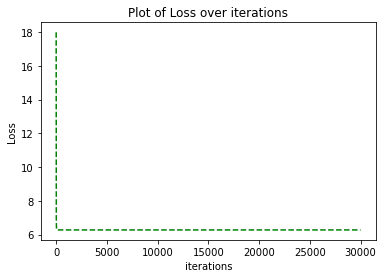

In [68]:
def cost_plot(iterations, costs):
    # YOUR CODE HERE
    loss= np.arange(0, iterations, 1)
    plt.plot(loss, costs,'g--')
    plt.xlabel('iterations')
    plt.ylabel('Loss')
    plt.title('Plot of Loss over iterations')
    #raise NotImplementedError()
    
cost_plot(iterations, costs)

## Exercise 2.8 (7 point)

Write the function of **normal equation** and write normal equation code:

YOUR ANSWER HERE

normal equation

In [69]:
# write normal equation code
from numpy.linalg import inv
def normal_equation(X,y):
    # xtx = np.linalg.inv(X.T.dot( X))
    # xty= X.T.dot( y)
    # theta_norm = xtx.dot( xty)
    theta_norm = inv(X.T @ X) @  X.T @ y
    #theta_norm = np.dot((inv(np.dot(X.T,X))), np.dot(X.T, y))
    # # YOUR CODE HERE
    # #raise NotImplementedError()
    

    return theta_norm[:,0]

In [66]:
# print(X.shape, y.shape)
# theta_norm = normal_equation(X,np.array([y]).T)
# theta_norm

In [70]:
theta_norm = normal_equation(X,np.array([y]).T)
print("theta from normal equation:", theta_norm.T)
y_norm_predicted =  h(X, theta_norm)
r_norm_square = goodness_of_fit(y, y_norm_predicted)
print("r_square:", r_norm_square)

assert np.array_equal(np.round(theta_norm.T, 5), np.round([[-7.90434550e-17,8.84765988e-01,-5.31788197e-02]], 5)), "the data result in theta is incorrect"
assert np.array_equal(np.round(r_norm_square, 5), np.round(0.7329450180289143, 5)), "result of r_square is incorrect"
assert np.round(r_norm_square, 5) == np.round(0.7329450180289143, 5), "result of r_square is incorrect"

theta from normal equation: [-8.32667268e-17  8.84765988e-01 -5.31788197e-02]
r_square: 0.7329450180289143


AssertionError: the data result in theta is incorrect

**Expect Result**:\
theta from normal equation: [[-7.90434550e-17  8.84765988e-01 -5.31788197e-02]]\
r_square: 0.7329450180289143

### Take-home exercise (30 points)
Use ``lab1data2.txt" to implement the normal equations and gradient descent then evaluate your model's performance.

Write a brief report on your experiments and results in the form of a Jupyter notebook.

Explain the dataset which you get and which rows which you use.
How many data in your dataset?

YOUR ANSWER HERE

%reset

Write down your all code at below.
Show the results, goodness of fit and plot cost graph

In [71]:
# YOUR CODE HERE
%reset
#raise NotImplementedError()

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [72]:
import matplotlib.pyplot as plt
import numpy as np

Read and Setup raw data housed in lab1data2.txt

In [74]:
# Read raw_data and setup data
raw_data = np.genfromtxt('lab1data2.txt',delimiter = ',', dtype=str);
raw_data = np.array(raw_data, dtype=float);

print(raw_data.shape)



(47, 3)


Write normalization function to normalize the raw data

In [75]:
# normalize the data
def normalization(data):
    mean= np.mean(data, axis=0)
    stds= np.std(data, axis=0)
    normalized_data = (data- mean)/stds
    return normalized_data
    

In [76]:
data= normalization(raw_data)

# insert dummy column at the 0th index housing ones

data= np.insert(data, 0, 1, axis=1)
# YOUR CODE HERE
#raise NotImplementedError()

First and Second columns are used as X features and last column as the y feature vector

In [77]:
# First and second columns are used as the predictor and the last column is used as predictant
X= data[:, 0:data.shape[1]-1]
y= data[:, data.shape[1]-1]


In [78]:
# formulate normal equation
from numpy.linalg import inv
def normal_eqn(X, y):
    norm_theta = inv(X.T @ X) @ X.T @y
    return norm_theta


In [79]:
theta_norm = normal_eqn(X, y)
theta_norm

array([-8.32667268e-17,  8.84765988e-01, -5.31788197e-02])

In [80]:
y_predicted= X @ theta_norm


In [81]:
# Transform normalized data back to original scale using the original statistics 
std = np.array(np.std(raw_data, axis=0))
mean = np.array(np.mean(raw_data, axis=0))

# destandarize y
y_pred_orgscale = y_predicted * std[2] + mean[2]
print(y_pred_orgscale[0:5])

[356283.1103389  286120.93063401 397489.46984812 269244.1857271
 472277.85514636]


/tmp/ipykernel_643/1474869370.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


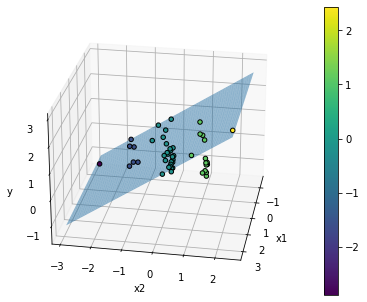

In [82]:
# 3D plot of standardized data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,1],X[:,2],y,edgecolors='black',c=data[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)

yy = (theta_norm[0] + theta_norm[1]*xx1.T + theta_norm[2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
#plt.show()

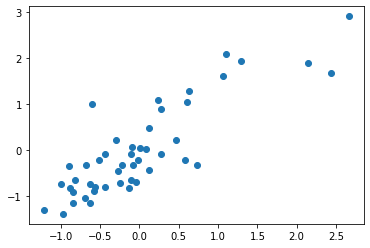

In [83]:
plt.scatter(y_predicted, y)

In [84]:
def goodness_of_fit(y, y_predicted):
    r_square= 1- (np.sum((y-y_predicted)**2)/ np.sum((y-np.mean(y))**2))
    return r_square

In [85]:
r_sq = goodness_of_fit(y, y_predicted)
print(r_sq)

0.7329450180289143


**Using gradient decent algorithm**

In [86]:
# write fuction for h that takes predictor and theta as arguments and yields predictant

def h(X, theta):
    y_predicted= X @ theta
    return y_predicted

In [87]:
print(h(X, np.array([1, 0., 4]))[:5])

[ 0.09562653  0.09562653  0.09562653 -5.21756761  5.40882067]


In [88]:
# Creat a cost function 

def cost(theta, X, y):
    y_pred = h(X, theta)
    dy = y_pred- y
    J= 1/2 * (dy.T@dy)
    return J

In [89]:
costs=cost(np.array([X.shape[1], 1, 10]), X, y)
print(costs)

2623.6374441604457


In [90]:
# define gradient for the cost function
def gradient(X, y, theta):
    grad= X.T @ ((X @ theta)-y)
    return grad

In [91]:
print(gradient(X, y, np.array([X.shape[1], 1, 10])))

[141.         270.00016917 475.5321861 ]


In [92]:
#Define Gradient Descent 

def gradient_descent (X, y, theta_intial, alpha, num_iters):
    J_per_iter= np.zeros(num_iters)
    gradient_per_iter= np.zeros((num_iters, len(theta_initial)))
    theta= theta_initial
    for i in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta -(alpha* grad)
        J = cost(theta, X, y)
        J_per_iter[i] = J
        gradient_per_iter[i]= grad.T
    return (theta, J_per_iter, gradient_per_iter)

        

In [93]:
theta_initial = np.array([X.shape[1], 1, 10])
alpha = 0.0001
iterations = 10000

(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, theta_initial, alpha, iterations)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [-9.14986656e-17  8.84765983e-01 -5.31788146e-02]
J_per_iter: [2591.85498459 2560.50437914 2529.5795071  ...    6.27579208    6.27579208
    6.27579208]
gradient_per_iter [[ 1.41000000e+02  2.70000169e+02  4.75532186e+02]
 [ 1.40337300e+02  2.67479641e+02  4.72586586e+02]
 [ 1.39677715e+02  2.64978712e+02  4.69661464e+02]
 ...
 [ 9.43689571e-16 -1.05527786e-07  1.05527761e-07]
 [-1.27675648e-15 -1.05309538e-07  1.05309514e-07]
 [ 3.88578059e-16 -1.05091744e-07  1.05091716e-07]]


In [94]:
y_predicted= h (X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

0.7329450180289141


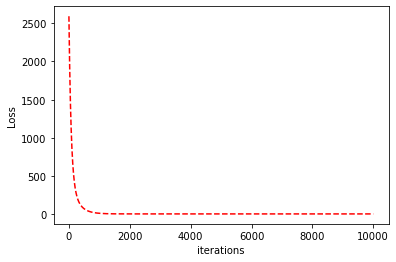

In [95]:
# Now plot the graph of loss vs. iterations
def cost_plot(iterations, costs):
    loss= np.arange(0, iterations, 1)
    plt.plot(loss, costs,'r--')
    plt.xlabel('iterations')
    plt.ylabel('Loss')

cost_plot(iterations, J_per_iter)